# **Atividade de Calculo: 2° Unidade** 

**Utilizando os minimos quadrados**

Esta atividade consiste em utilizar o método dos mínimos quadrados para gerar curvas que aproximam os conjuntos de dados fornecidos. A formatação dos conjuntos de dados consistem em duas colunas de
números reais. Cada linha representa um ponto do plano cartesiano,
em que o valor na primeira coluna contém a coordenadas x, enquanto
a segunda coluna cont´em a coordenadas y.

Todos os conjuntos de dados estão com um ruído colocado artificialmente, refletindo a situação real em que toda a medida carrega alguma margem de erro devido ao instrumento. Devido aos extensos conjuntos de dados, recomendo utilizar a linguagem de programação a sua escolha para fazer os cálculos.

Ferramentas como Python, Gnuplot e Octave serão úteis para visualizar os dados e as curvas geradas em conjunto. (Para o fim deste trabalho, Gnuplot é o mais simples). Aos menos experientes em linguagens de programação, o anexo deste trabalho possui um modelo para te orientar na programação.

Em todos os problemas, é desejado que vocês apresentem o gráfico
com a curva obtida sobre o conjunto de dados do problema, acrescentando comentários sobre o que foi observado. Além disto, anexe os seus códigos junto com o trabalho.

## **Implementação inicial**

In [16]:
from dataclasses import dataclass
import csv
from typing import List
import matplotlib.pyplot as plt
import numpy as np

In [18]:
@dataclass
class Ponto:
    x: float
    y: float

In [19]:
def import_pontos(path: str) -> List[Ponto]:
    _pontos = []

    try:
        with open(path, mode='r', encoding='utf-8') as data:
            csv_file = csv.reader(data)
            next(csv_file) #cabecalho do csv

            for linha in csv_file:
                _ponto = Ponto(x=float(linha[0]), y=float(linha[1]))
                _pontos.append(_ponto)

    except (ValueError, IndexError) as e:
        print(f"Erro: {e}")

    return _pontos

Definição de MMQ (Método dos Mínimos Quadrados) para uma reta:

$$
f(x) = ax + b
$$

onde:

$$
a = \frac{n(\sum x_i y_i) - (\sum x_i)(\sum y_i)}{n(\sum x_i^2) - (\sum x_i)^2}
$$

e

$$
b = \bar{y} - a\bar{x}
$$

ver: [MMQ](https://fisica.ufpr.br/graff/MMQ%20web.pdf)

In [62]:
# usa minimos quadrados para obter a reta
#f(x)= ax + b                        |       a  ,   b
def get_reta(pontos: List[Ponto]) -> tuple[float, float]:
    #verifica de existe algum ponto
    if len(pontos) == 0: 
        return (0,0)

    Sx = sum(p.x for p in pontos) 
    Sy = sum(p.y for p in pontos)
    Sxx = sum(p.x**2 for p in pontos)
    Sxy = sum(p.x * p.y for p in pontos)

    _a = (((len(pontos)*Sxy) - (Sx * Sy)) / ((len(pontos)*Sxx) - (Sx**2)))
    _b = (Sy/len(pontos)) - (_a * Sx)

    return (_a, _b)

In [36]:
def plot_grafico(x_pontos: float, y_pontos: float, x_reta: float, y_reta:float):

    plt.scatter(x_pontos, y_pontos, label='Dados Originais', color='blue', s=5, alpha=0.5)
    plt.plot(x_reta, y_reta, label=f'Reta de Ajuste', color='red', linewidth=2)
    
    plt.title('Método dos Mínimos Quadrados')
    plt.xlabel('Eixo X')
    plt.ylabel('Eixo Y')
    plt.legend() 
    plt.grid(True) 
    
    plt.show()

## **Parte 1: Retas**

### **Exercício 1**

Abra o conjunto de dados ”dados_reta.csv” e utilize o método dos mínimos quadrados para  encontrar a melhor reta que aproxima estes dados.

• A aproximação ficou satisfatória neste caso? Justifique.

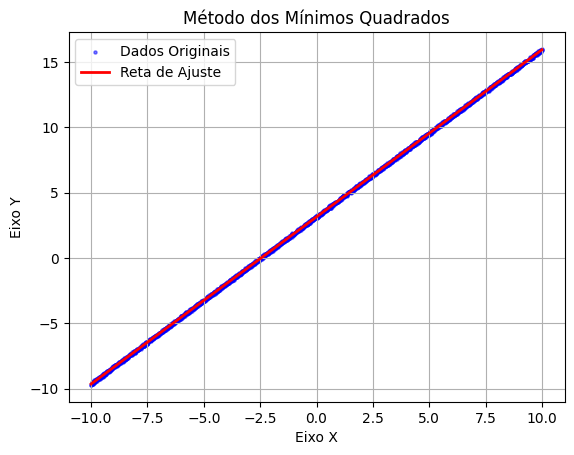

In [41]:
#Exercicio 1

pontos1 = import_pontos("../data/dados_reta.csv")

coef_a, coef_b = get_reta(pontos1)

#plotando grafico 
x_pontos1 = [p.x for p in pontos1]
y_pontos1 = [p.y for p in pontos1]

x = np.linspace(min(x_pontos1), max(x_pontos1), 100)
reta_fx = coef_a*x + coef_b


plot_grafico(
    x_pontos= x_pontos1,
    y_pontos= y_pontos1,
    x_reta=x,
    y_reta= reta_fx
)


Nesse caso, é possível verificar que a aproximação foi satisfatória por apresentar uma reta quase perfeita que determina todos os pontos.

### **Exercício 2**

Abra o conjunto de dados ”dados reta2.txt” e utilize o método dos mínimos quadrados para encontrar a melhor reta que aproxima estes dados.

• Este conjunto de dados apresentam poucos dados e com maior espaçamento para ajudar na interpretação do resultado obtido.

• Apesar do ruído nos dados originais, a reta obtida representou o comportamento geral dos dados?

• A aproximação ficou satisfatória neste caso? Justifique.

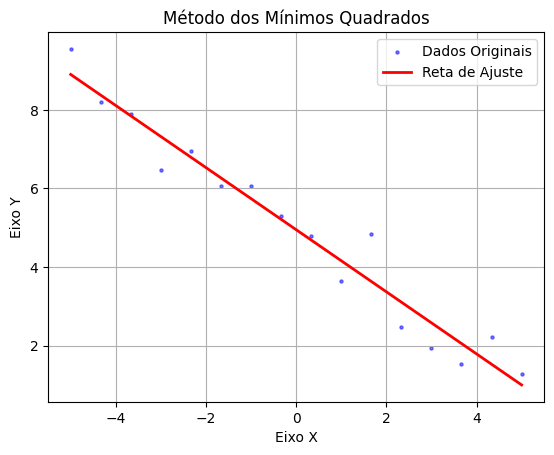

In [44]:
#Exercicio 2

pontos2 = import_pontos("../data/dados_reta2.csv")

coef_a2, coef_b2 = get_reta(pontos2)

#plotando grafico 
x_pontos2 = [p.x for p in pontos2]
y_pontos2 = [p.y for p in pontos2]

x2 = np.linspace(min(x_pontos2), max(x_pontos2), 100)
reta_fx2 = coef_a2*x + coef_b2


plot_grafico(
    x_pontos= x_pontos2,
    y_pontos= y_pontos2,
    x_reta=x2,
    y_reta= reta_fx2
)

Nesse caso, temos que, devido à pouca quantidade de dados e com maior espaçamento, a reta resultante acaba se comportando como a média dos pontos.

### **Exercício 3**

O conjunto de dados ”dados ruidosos.txt” apresenta um ruído muito alto! Utilize o método dos mínimos quadrados para encontrar a melhor reta que aproxima estes dados.

• Apesar dos altos erros ao aproximar os pontos pela reta, o método ao menos conseguiu representar uma tendência geral dos dados? Justifique.

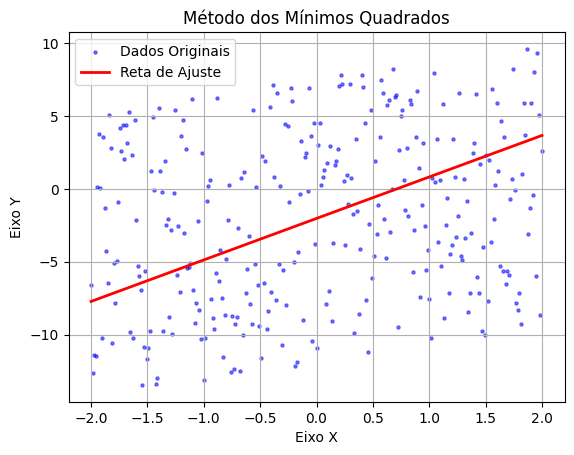

In [45]:
#Exercicio 3

pontos3 = import_pontos("../data/dados_ruidosos.csv")

coef_a3, coef_b3 = get_reta(pontos3)

#plotando grafico 
x_pontos3 = [p.x for p in pontos3]
y_pontos3 = [p.y for p in pontos3]

x3 = np.linspace(min(x_pontos3), max(x_pontos3), 100)
reta_fx3 = coef_a3*x + coef_b3


plot_grafico(
    x_pontos= x_pontos3,
    y_pontos= y_pontos3,
    x_reta=x3,
    y_reta= reta_fx3
)

A reta resultante conseguiu apresentar uma tendência de aumento de valores no eixo y conforme o eixo x, apesar de não conseguir aproximar corretamente, devido ao grande ruído.

### **Exercício 4**

Abra o conjunto de dados ”dados reta3.txt” e utilize o método dos mínimos quadrados para encontrar a melhor reta que aproxima estes dados.

• Como este conjunto se difere dos anteriores?
• A aproximação ficou satisfatória neste caso? Justifique.

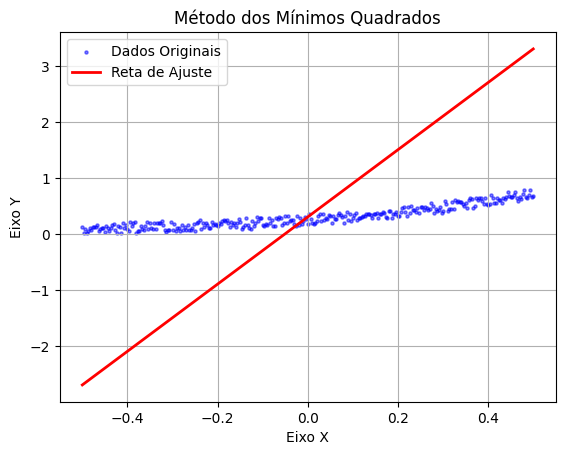

In [46]:
#Exercicio 4

pontos4 = import_pontos("../data/dados_reta3.csv")

coef_a4, coef_b4 = get_reta(pontos4)

#plotando grafico 
x_pontos4 = [p.x for p in pontos4]
y_pontos4 = [p.y for p in pontos4]

x4 = np.linspace(min(x_pontos4), max(x_pontos4), 100)
reta_fx4 = coef_a4*x + coef_b4


plot_grafico(
    x_pontos= x_pontos4,
    y_pontos= y_pontos4,
    x_reta=x4,
    y_reta= reta_fx4
)

Os dados originais apresentam uma tendência de uma parábola com concavidade para cima, que não pôde ser representada corretamente pela reta resultante.

### **Exercício 5**

O conjunto de dados ”dados reta4.txt” representa a mesma função que o caso anterior, mas com um domínio mais amplo. Utilize o método dos mínimos quadrados para encontrar a melhor reta que aproxima estes dados.

• A aproximação ficou satisfatória neste caso? Justifique.

• A partir deste experimento e do anterior, pondere sobre quando a aproximação por uma reta pode ser utilizada.

• Proponha uma metodologia para verificar o quão boa uma aproximação ficou.

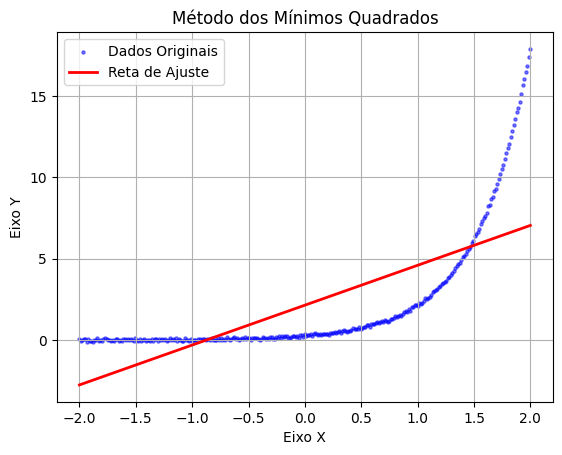

In [56]:
#Exercicio 5

pontos5 = import_pontos("../data/dados_reta4.csv")

coef_a5, coef_b5 = get_reta(pontos5)

#plotando grafico 
x_pontos5 = [p.x for p in pontos5]
y_pontos5 = [p.y for p in pontos5]

x5 = np.linspace(min(x_pontos5), max(x_pontos5), 100)
reta_fx5 = coef_a5*x5 + coef_b5


plot_grafico(
    x_pontos= x_pontos5,
    y_pontos= y_pontos5,
    x_reta=x5,
    y_reta= reta_fx5
)


Da mesma forma que no exercício anterior, os dados originais apresentam uma tendência de uma parábola com concavidade para cima, que não pôde ser representada corretamente pela reta resultante.

## **Parte 2: Outras funções**

### **Exercício 1**

Obtenha a curva que aproxima o conjunto de dados ”dados par.txt” utilizando a função quadrática

In [ ]:
#                                        |       a  ,   b  ,   c
def get_parabola(pontos: List[Ponto]) -> tuple[float, float, float]:
    #verifica de existe algum ponto
    if len(pontos) == 0: 
        return (0,0,0)

    x = np.array([p.x for p in pontos])
    y = np.array([p.y for p in pontos])
    n = len(pontos)

    s_x = np.sum(x)
    s_x2 = np.sum(x**2)
    s_x3 = np.sum(x**3)
    s_x4 = np.sum(x**4)
    
    s_y = np.sum(y)
    s_xy = np.sum(x * y)
    s_x2y = np.sum(x**2 * y)

    # Monta a matriz A e o vetor B do sistema de equações
    A = np.array([
        [s_x4, s_x3, s_x2],
        [s_x3, s_x2, s_x],
        [s_x2, s_x,  n]
    ])
    
    B = np.array([s_x2y, s_xy, s_y])

    # Resolve o sistema A * [a,b,c] = B para encontrar os coeficientes
    a, b, c = np.linalg.solve(A, B)
    return (a, b, c)


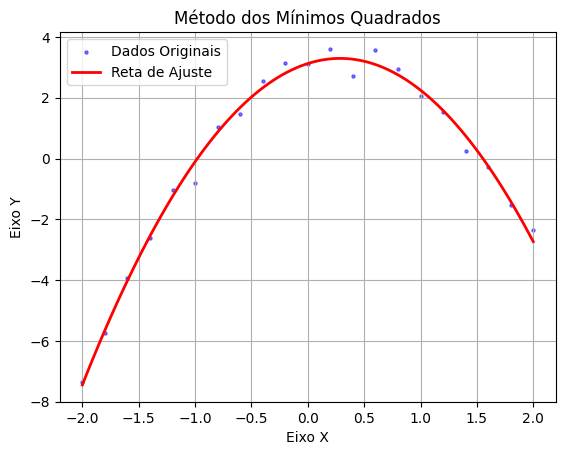

In [60]:
#Exercicio 2.1

pontos = import_pontos("../data/dados_par.csv")

coef_a, coef_b, coef_c = get_parabola(pontos)

#plotando grafico 
x_pontos = [p.x for p in pontos]
y_pontos = [p.y for p in pontos]

x = np.linspace(min(x_pontos), max(x_pontos), 100)
reta_fx =  coef_a * x**2 + coef_b * x + coef_c


plot_grafico(
    x_pontos= x_pontos,
    y_pontos= y_pontos,
    x_reta=x,
    y_reta= reta_fx
)

### Exercício 2

Obtenha a curva que aproxima o conjuntos de dados ”dados exp.txt” utilizando a função exponencial.


A modelagem do método dos mínimos quadrados para este problema resultará em um sistema que não é de equações lineares! Para facilitar os cálculos, vamos fazer um procedimento chamado de linearização.

Ao invés de calcular os erros como a diferen¸ca entre o valor esperado e o valor medido (ϵ = f (xi) − yi), vamos considerar o logaritmo destes valores, ou seja:

$$
ϵ = Ln(f (xi)) − Ln(yi)
$$

Assim, o problema se tornará análogo ao da reta. Mas tenha ciência que estamos minimizando o quadrado da diferen¸ca dos logaritmos, o que traz certas anomalias devido a alta taxa de crescimento do logaritmo em valores pequenos.

In [66]:
#                                   |       a  ,   b
def get_exp(pontos: List[Ponto]) -> tuple[float, float]:
    #verifica de existe algum ponto
    if len(pontos) == 0: 
        return (0,0)

    Sx = sum(p.x for p in pontos) 
    Sxx = sum(p.x**2 for p in pontos)
    S_lny = sum(np.log(p.y) for p in pontos)
    S_xlny = sum(p.x * np.log(p.y) for p in pontos)
    n = len(pontos)

    a = ((n * S_xlny) - (Sx * S_lny)) / (n * Sxx) - (Sx**2)
    
    ln_b = (S_lny - a * Sx) / n
    
    b = np.exp(ln_b)

    return (a, b)

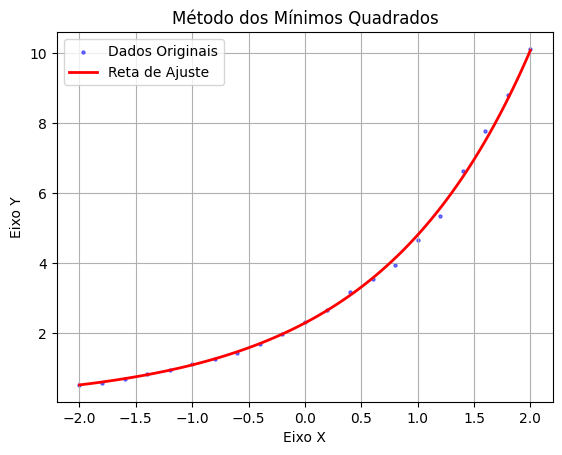

In [68]:
#Exercicio 5

pontos_exp = import_pontos("../data/dados_exp.csv")

coef_exp_a, coef_exp_b = get_exp(pontos_exp)

#plotando grafico 
x_pontos_exp = [p.x for p in pontos_exp]
y_pontos_exp = [p.y for p in pontos_exp]

x = np.linspace(min(x_pontos_exp), max(x_pontos_exp), 100)
fx = coef_exp_b * np.exp(coef_exp_a*x)


plot_grafico(
    x_pontos= x_pontos_exp,
    y_pontos= y_pontos_exp,
    x_reta=x,
    y_reta= fx
)
